Let's perform a hypothesis test for a known population mean. We'll use a z-test for this example. Assume you have a sample and want to test if its mean is significantly different from a known population mean. We'll use matplotlib to visualize the results.

#### Hypothesis Testing Steps (One-Sample)

1. **Define the Null and Alternative Hypothesis (H0):** This is the hypothesis that there is no significant difference or effect. It often includes an equal sign (=).

2. **Choose the Significance Level (α):** This is the probability of rejecting the null hypothesis when it is true. Common choices are 0.05, 0.01, or 0.10.
   - the significance level (α) represents the probability of making a Type I error, which is the probability of rejecting a true null hypothesis.
   - It is explicitly chosen by the researcher before conducting the test. Common choices are 0.05, 0.01, etc.

3. **Collect and Analyze Data:**
   - Collect a sample of data relevant to the hypothesis.
   - Summarize the data using appropriate descriptive statistics (mean, standard deviation, etc.).
   - Choose the Appropriate Test Statistic, For a one-sample test, if you know the population standard deviation, you might use a z-test. If not, a t-test is more common.


4. **Compute the Test Statistic:**
   - calculating the test statistic involves determining how many standard deviations the sample mean ($\bar{x}$) is away from the hypothesized population mean ($\mu$) in a standard normal distribution. This is done using the formula:
   $[ Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}]$

5. **Determine the Critical Region or Critical Value:**
   - Based on the chosen significance level (α), determine the critical region (the range of values that would lead to rejecting the null hypothesis).
   - The critical value is used to define the rejection region(s) in a hypothesis test.
   - It represents the boundary beyond which you would reject the null hypothesis.
   - For a two-tailed test with a significance level of α, it corresponds to the z-score that leaves α/2 in the upper tail and α/2 in the lower tail of the standard normal distribution.

6. **Test Statistic (z-statistics)::**
    - The test statistic is calculated from the sample data and is used to determine how far the sample result is from the null hypothesis.
    - It provides a standardized measure of how many standard deviations the sample mean is from the population mean under the null hypothesis.
    - It is used to make a decision about whether to reject the null hypothesis based on a comparison with the critical value.
7. **Draw a Conclusion:**
    - Based on the decision in step 8, conclude whether there is enough evidence to reject the null hypothesis or not.

**Note:** The steps may vary slightly based on the specific hypothesis test being used (z-test, t-test, etc.) and the characteristics of the data.


In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest

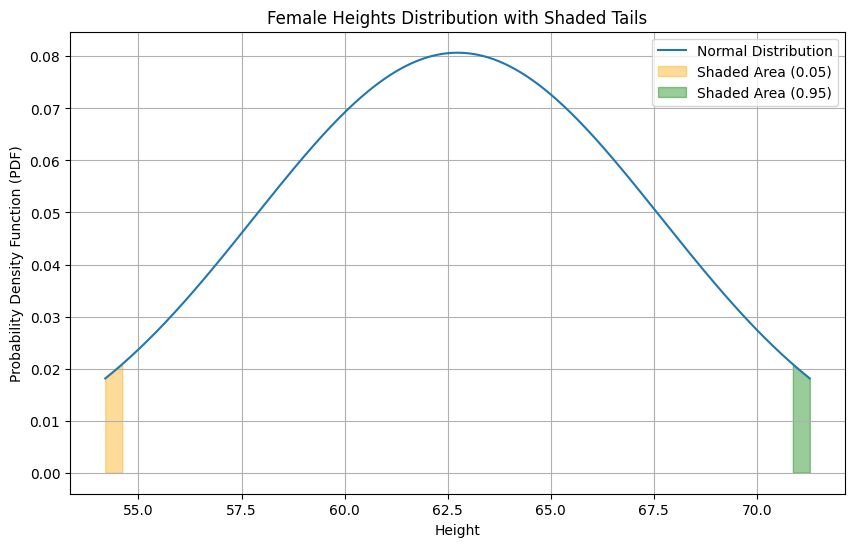

In [46]:
population_mean = 64
population_std = 2.5
sample_size = 1000

# Generate random variables for female heights
female_heights = stats.norm.rvs(loc=population_mean, scale=population_std, size=sample_size)

# Calculate the z-scores for each female height
z_scores = (female_heights - population_mean) / population_std

x = np.linspace(min(female_heights), max(female_heights), 500)
pdf = stats.norm.pdf(x, np.mean(x), np.std(x))
cum_prob_lower_bound = stats.norm.cdf(x, np.mean(x), np.std(x)) <= 0.05
cum_prob_upper_bound = stats.norm.cdf(x, np.mean(x), np.std(x)) >= 0.95

# Plot the distribution of female heights with shaded tails using CDF
plt.figure(figsize=(10, 6))
# plt.hist(female_heights, bins=20, density=True, alpha=0.7, label="Female Heights Distribution")

plt.plot(x, pdf, label="Normal Distribution")
plt.fill_between(x, pdf, where=cum_prob_lower_bound, color='orange', alpha=0.4, label="Shaded Area (0.05)")
plt.fill_between(x, pdf, where=cum_prob_upper_bound, color='green', alpha=0.4, label="Shaded Area (0.95)")

plt.title("Female Heights Distribution with Shaded Tails")
plt.xlabel("Height")
plt.ylabel("Probability Density Function (PDF)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [41]:
min(female_heights), max(female_heights)

(54.779086771428894, 71.79420282302011)

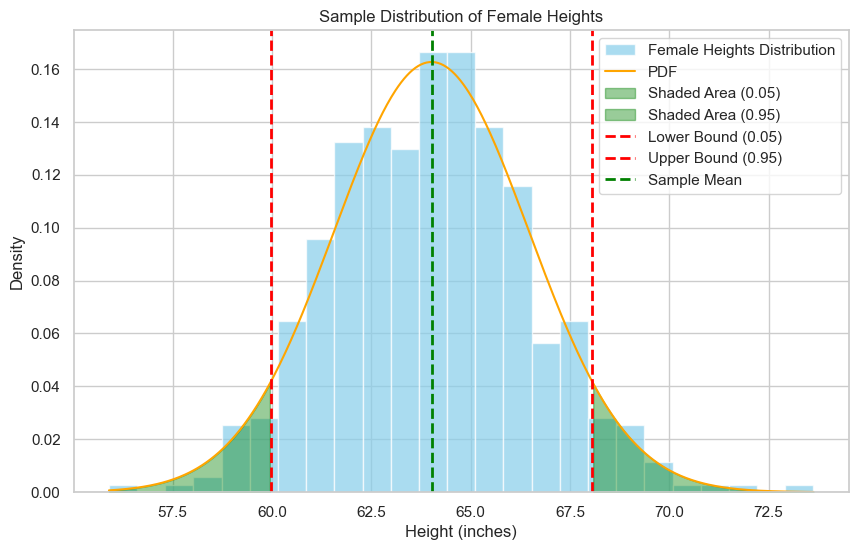

Critical value: 1.9600
Test Statistic (z): 0.1529
P-value: 0.8785
Decision: Fail to reject the null hypothesis


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)

# Population parameters for female height
population_mean = 64
population_std = 2.5

# Step 1: Define null and alternative hypotheses
null_hypothesis_mean = 64

# Step 2: Choose significance level
alpha = 0.05  # significance level = (1 - confidence_interval 0.95)

# Step 3: Collect a sample of data
sample_size = 500
female_heights = stats.norm.rvs(loc=population_mean, scale=population_std, size=sample_size)

# Step 4: Compute test statistic
sample_mean = np.mean(female_heights)
sample_std = np.std(female_heights, ddof=1)  # Use ddof=1 for sample standard deviation

critical_value = stats.norm.ppf(1 - alpha / 2)  # Use ppf for inverse CDF

z_statistics = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistics)))  # Multiply by 2 for a two-tailed test

if p_value < alpha:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

# Plot the sample distribution
plt.figure(figsize=(10, 6))
plt.hist(female_heights, bins=25, density=True, color='skyblue', alpha=0.7, label="Female Heights Distribution")
plt.title('Sample Distribution of Female Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Density')

plt.plot()

# Plot PDF using np.linspace and stats.norm.pdf
x_vals = np.linspace(min(female_heights), max(female_heights), 500)
pdf_values = stats.norm.pdf(x_vals, loc=sample_mean, scale=sample_std)
plt.plot(x_vals, pdf_values, color='orange', label='PDF')


# Find the cumulative probabilities corresponding to the z-scores
cumulative_prob_lower_bound = stats.norm.cdf(x_vals, sample_mean, sample_std) <= 0.05
cumulative_prob_upper_bound = stats.norm.cdf(x_vals, sample_mean, sample_std) >= 0.95
plt.fill_between(x_vals, pdf_values, where=cumulative_prob_lower_bound, color='green', alpha=0.4, label="Shaded Area (0.05)")
plt.fill_between(x_vals, pdf_values, where=cumulative_prob_upper_bound, color='green', alpha=0.4, label="Shaded Area (0.95)")


# # Highlight the critical region
# lower_bound = population_mean - critical_value * (population_std / np.sqrt(sample_size))
# upper_bound = population_mean + critical_value * (population_std / np.sqrt(sample_size))
# plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Critical Region')
# plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)

lower_bound = stats.norm.ppf(0.05, sample_mean, sample_std)
upper_bound = stats.norm.ppf(0.95, sample_mean, sample_std)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound (0.05)')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound (0.95)')



# Highlight the sample mean
plt.axvline(sample_mean, color='green', linestyle='dashed', linewidth=2, label='Sample Mean')

plt.legend()
plt.show()

print(f"Critical value: {critical_value:.4f}")
print(f"Test Statistic (z): {z_statistics:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")


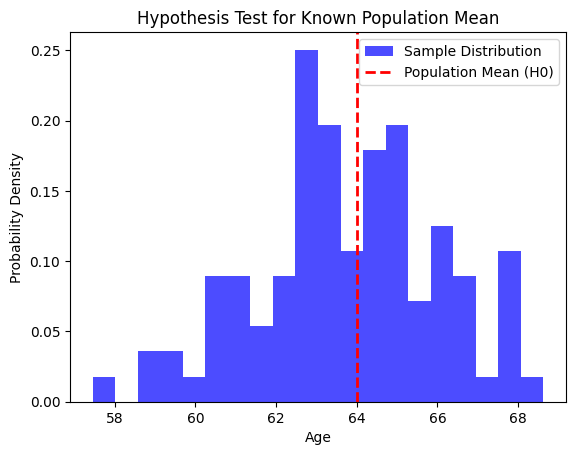

Z-statistic: -1.1435
P-value: 0.2528
Null Hypothesis Rejected: False


In [40]:

# Set seed for reproducibility
np.random.seed(42)

# Known population parameters
population_mean = 64
population_std  = 2.5


# Generate sample data
sample_size = 100
sample_ages = np.random.normal(population_mean, population_std, sample_size)

# Set the null hypothesis (H0) - Let's say the population mean is 30
null_hypothesis_mean = 64

# Perform one-sample z-test
z_stat, p_value = ztest(sample_ages, value=null_hypothesis_mean)

# Set significance level (alpha)
alpha = 0.05

# Check if the null hypothesis can be rejected
reject_null_hypothesis = p_value < alpha

# Plot the sample distribution and the null hypothesis mean
plt.hist(sample_ages, bins=20, density=True, alpha=0.7, color='blue', label='Sample Distribution')

plt.axvline(null_hypothesis_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean (H0)')

# Set labels and legend
plt.title('Hypothesis Test for Known Population Mean')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

# Display the results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Null Hypothesis Rejected: {reject_null_hypothesis}")


critical_value 1.959963984540054


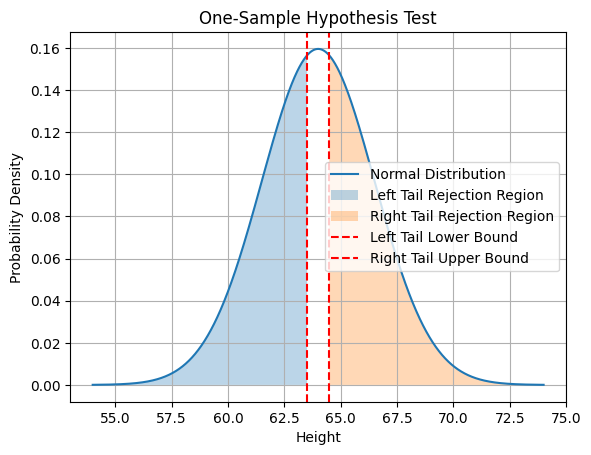

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given data
population_mean = 64
population_std = 2.5
sample_size = 100
alpha = 0.05

# Step 1: Calculate critical values
critical_value = norm.ppf(1 - alpha / 2)
print(f"critical_value {critical_value}")

# Step 2: Generate x-axis values
x = np.linspace(population_mean - 4 * population_std, population_mean + 4 * population_std, 1000)

# Step 3: Calculate pdf values
pdf_values = norm.pdf(x, population_mean, population_std)

# Step 4: Identify rejection region boundaries
lower_bound_left = population_mean - critical_value * (population_std / np.sqrt(sample_size))
upper_bound_right = population_mean + critical_value * (population_std / np.sqrt(sample_size))

# Step 5: Plot the normal distribution curve
plt.plot(x, pdf_values, label='Normal Distribution')

# Shade the left tail of the rejection region
plt.fill_between(x, pdf_values, where=(x <= lower_bound_left), alpha=0.3, label='Left Tail Rejection Region')

# Shade the right tail of the rejection region
plt.fill_between(x, pdf_values, where=(x >= upper_bound_right), alpha=0.3, label='Right Tail Rejection Region')

# Add vertical lines for rejection region boundaries
plt.axvline(lower_bound_left, color='red', linestyle='--', label='Left Tail Lower Bound')
plt.axvline(upper_bound_right, color='red', linestyle='--', label='Right Tail Upper Bound')

# Customize the plot
plt.title('One-Sample Hypothesis Test')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
population_mean - critical_value

62.04003601545995

In [2]:
lower_bound

63.51000900386499

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given data
population_mean = 64
population_std = 2.5
sample_size = 100
alpha = 0.05

# Step 1: Calculate critical values
critical_value = norm.ppf(1 - alpha / 2)

# Step 2: Generate x-axis values
x = np.linspace(population_mean - 4 * population_std, population_mean + 4 * population_std, 1000)

# Step 3: Calculate pdf values
pdf_values = norm.pdf(x, population_mean, population_std)

# Step 4: Identify rejection region boundaries
lower_bound_left  = stats.norm.ppf(alpha / 2, loc=population_mean, scale=population_std)
upper_bound_right = stats.norm.ppf

# Step 5: Plot the normal distribution curve
plt.plot(x, pdf_values, label='Normal Distribution')

# Shade the left tail of the rejection region
plt.fill_between(x, pdf_values, where=(x <= lower_bound_left), alpha=0.3, label='Left Tail Rejection Region')

# Shade the right tail of the rejection region
plt.fill_between(x, pdf_values, where=(x >= upper_bound_right), alpha=0.3, label='Right Tail Rejection Region')

# Add vertical lines for rejection region boundaries
plt.axvline(lower_bound_left, color='red', linestyle='--', label='Left Tail Lower Bound')
plt.axvline(upper_bound_right, color='red', linestyle='--', label='Right Tail Upper Bound')

# Customize the plot
plt.title('One-Sample Hypothesis Test')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [22]:

import numpy as np
from scipy import stats

np.random.seed(42)
population_mean = 64
population_std = 2.5

# Step 1: Define null and alternative hypotheses
null_hypothesis_mean = 64

# Step 2: Choose significance level
alpha = 0.05 # significance level = ( 1 - confidence_interval 0.95 )

# Step 3: Collect a sample of data
sample_size = 100
female_heights = stats.norm.rvs(loc=population_mean, scale=population_std, size=sample_size)

# Step 4: Compute test statistic
sample_mean = np.mean(female_heights)
z_statistic = (sample_mean - null_hypothesis_mean) / (population_std / np.sqrt(sample_size))

critical_value = stats.norm.ppf(1 - alpha / 2)  # Use ppf for inverse CDF

# Step 5: Determine the critical region
critical_region_left = null_hypothesis_mean - critical_value * (population_std / np.sqrt(sample_size))
critical_region_right = null_hypothesis_mean + critical_value * (population_std / np.sqrt(sample_size))

# Step 6: Make a decision
if z_statistic < critical_region_left or z_statistic > critical_region_right:
    print(f"The test statistic ({z_statistic:.2f}) falls in the critical region ({critical_region_left:.2f}, {critical_region_right:.2f}). Therefore, we reject the null hypothesis.")
else:
    print(f"The test statistic ({z_statistic:.2f}) does not fall in the critical region ({critical_region_left:.2f}, {critical_region_right:.2f}). Therefore, we fail to reject the null hypothesis.")

The test statistic (-1.04) falls in the critical region (63.51, 64.49). Therefore, we reject the null hypothesis.
